# Explorative Data Analysis: King County Housing Market 2014-2015

![alt text](optional/bellevue_fall_lnb6qm.webp)

This notebook provides an explorative data analysis of house sales in King County from 2014 to 2015. It consists of two parts:

1. A classical EDA focusing on data quality and descriptive statistics.
2. A client-focused analysis that helps a client in making an investment decision.

## Setup

In [2]:
# Importing packages and setup
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium

# Plotting settings
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)
sns.set(rc = {'figure.figsize':(16, 8)})

## Data Exploration

As shown below, our data consists of 21597 observations and the following 21 columns:

1. **id** - unique identified for a house
1. **date** - house was sold
1. **price** - is prediction target
1. **bedrooms** - # of bedrooms
1. **bathrooms** - # of bathrooms
1. **sqft_living** - footage of the home
1. **sqft_lots** - footage of the lot
1. **floors** - floors (levels) in house
1. **waterfront** - House which has a view to a waterfront
1. **view** - quality of view
1. **condition** - How good the condition is ( Overall )
1. **grade** - overall grade given to the housing unit, based on King County grading system
1. **sqft_above** - square footage of house apart from basement
1. **sqft_basement** - square footage of the basement
1. **yr_built** - Built Year
1. **yr_renovated** - Year when house was renovated
1. **zipcode** - zip
1. **lat** - Latitude coordinate
1. **long** - Longitude coordinate
1. **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
1. **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [30]:
# Importing and exploring the data
df = pd.read_csv('data/eda.csv',index_col=False)
display(df)

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.000,263000018,21593,263000018,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,3,8,1530.000,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000
21593,2015-02-23,400000.000,6600060120,21594,6600060120,4.000,2.500,2310.000,5813.000,2.000,0.000,0.000,3,8,2310.000,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000
21594,2014-06-23,402101.000,1523300141,21595,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,3,7,1020.000,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000
21595,2015-01-16,400000.000,291310100,21596,291310100,3.000,2.500,1600.000,2388.000,2.000,NaN,0.000,3,8,1600.000,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000


## Data Cleaning

### Dropping Rows and Columns

Here we perform the following manipulations:

1. Confirm that the number of duplicate rows is 0.
2. Drop the id.1 colum that was generated by the SQL join.
3. Correct the yr_renovated column.
4. Convert some columns to integer values.
5. Change some columns to datetime format.

In [31]:
# Calculating the number of duplicates
duplicates = df.duplicated(subset=None, keep='first').sum()
print(f"Number of duplicate rows: {duplicates}")

# Dropping id.1 because it is identical to house_id, renaming for less confusion
df.drop("id.1", axis="columns", inplace=True, errors="ignore")
df.rename(columns={"id": "sales_id"}, inplace=True)

# Correcting yr_renovated column
df["yr_renovated"] = df["yr_renovated"].multiply(1/10)
df["yr_renovated"].replace(0, np.nan, inplace=True)

#  Changing data type to integer
df[["bedrooms","floors","view","condition","yr_built","grade","zipcode"]] = df[["bedrooms","floors","view","condition","yr_built","grade","zipcode"]].astype("int", errors="ignore")

# Changing date and years to datetime
df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d')
df["yr_built"] = pd.to_datetime(df["yr_built"],format='%Y').dt.strftime('%Y').astype("int")

Number of duplicate rows: 0


### Missing Values

As we can see below there are missing values in the following 4 columns:

1. waterfront
2. view
3. sqft_basement
4. yr_renovated

However, since they are not relevant for our client's needs, we are setting them aside.

<Axes: >

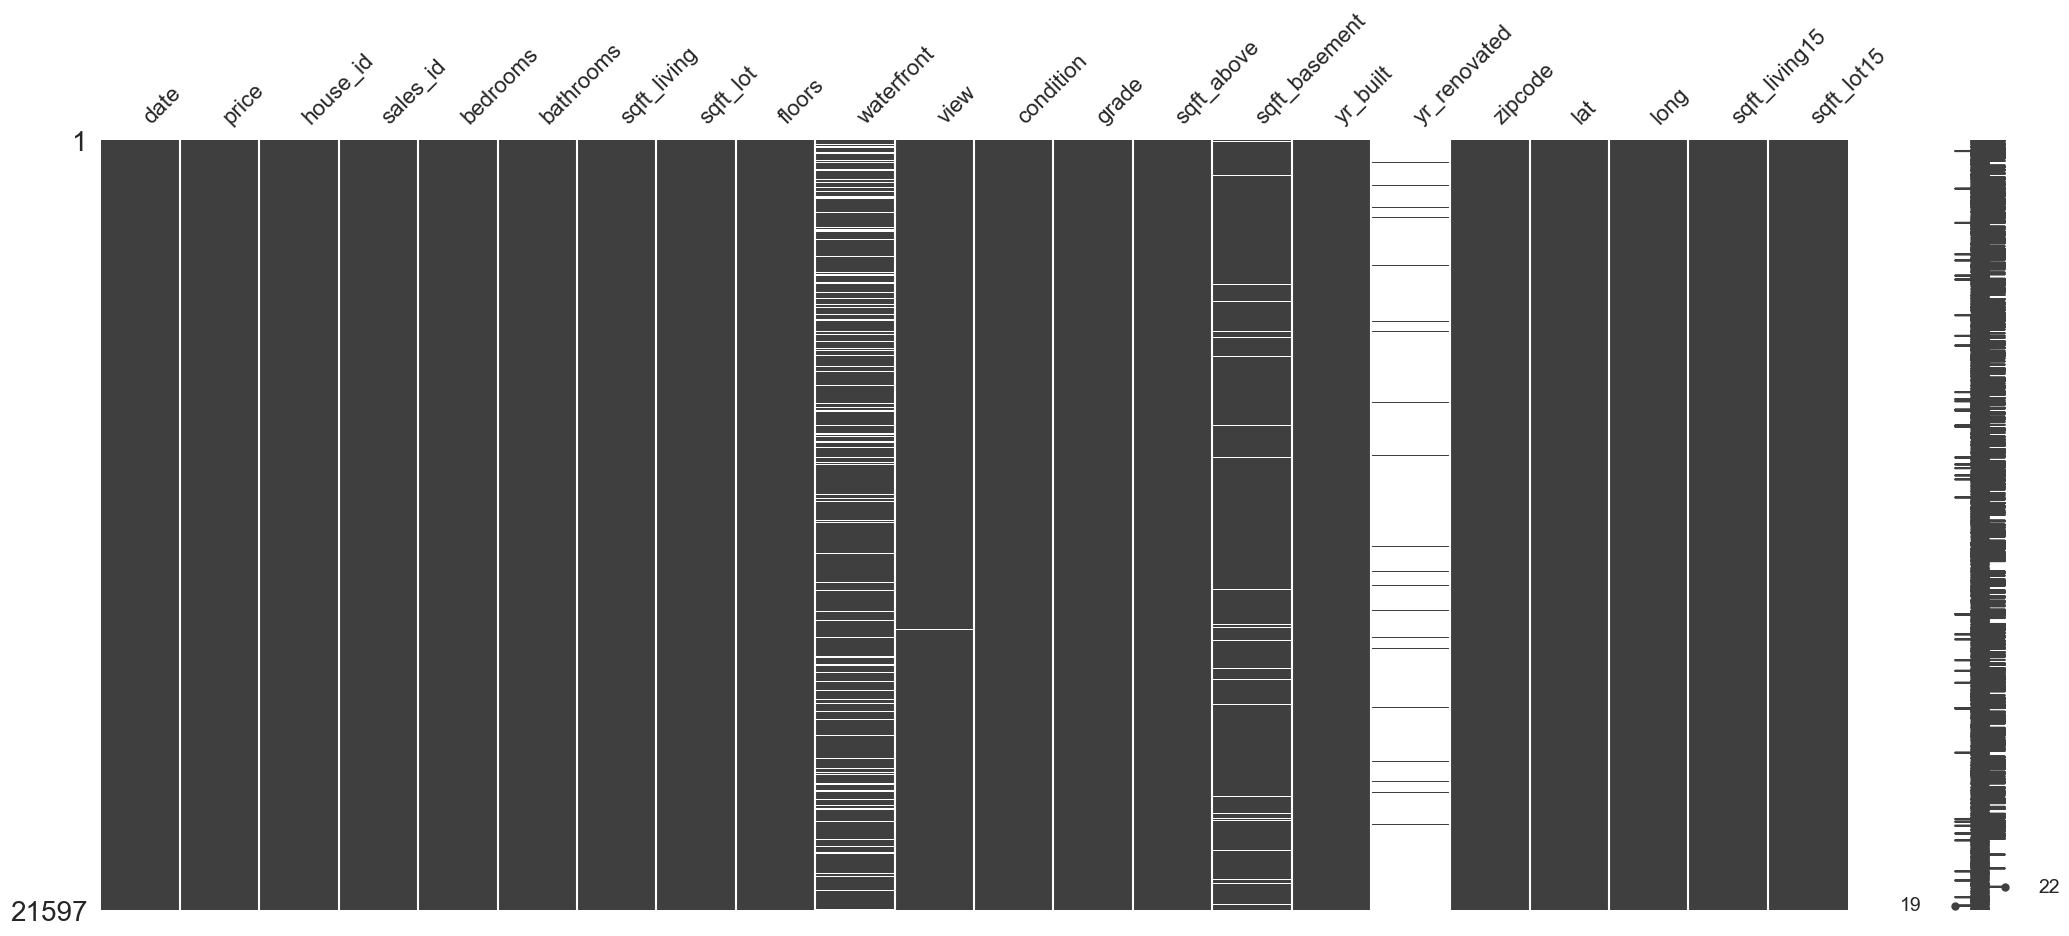

In [5]:
# Checking for missing values
msno.matrix(df)

### Distributional Properties

The plot below provides histograms for each column except house and sales id.

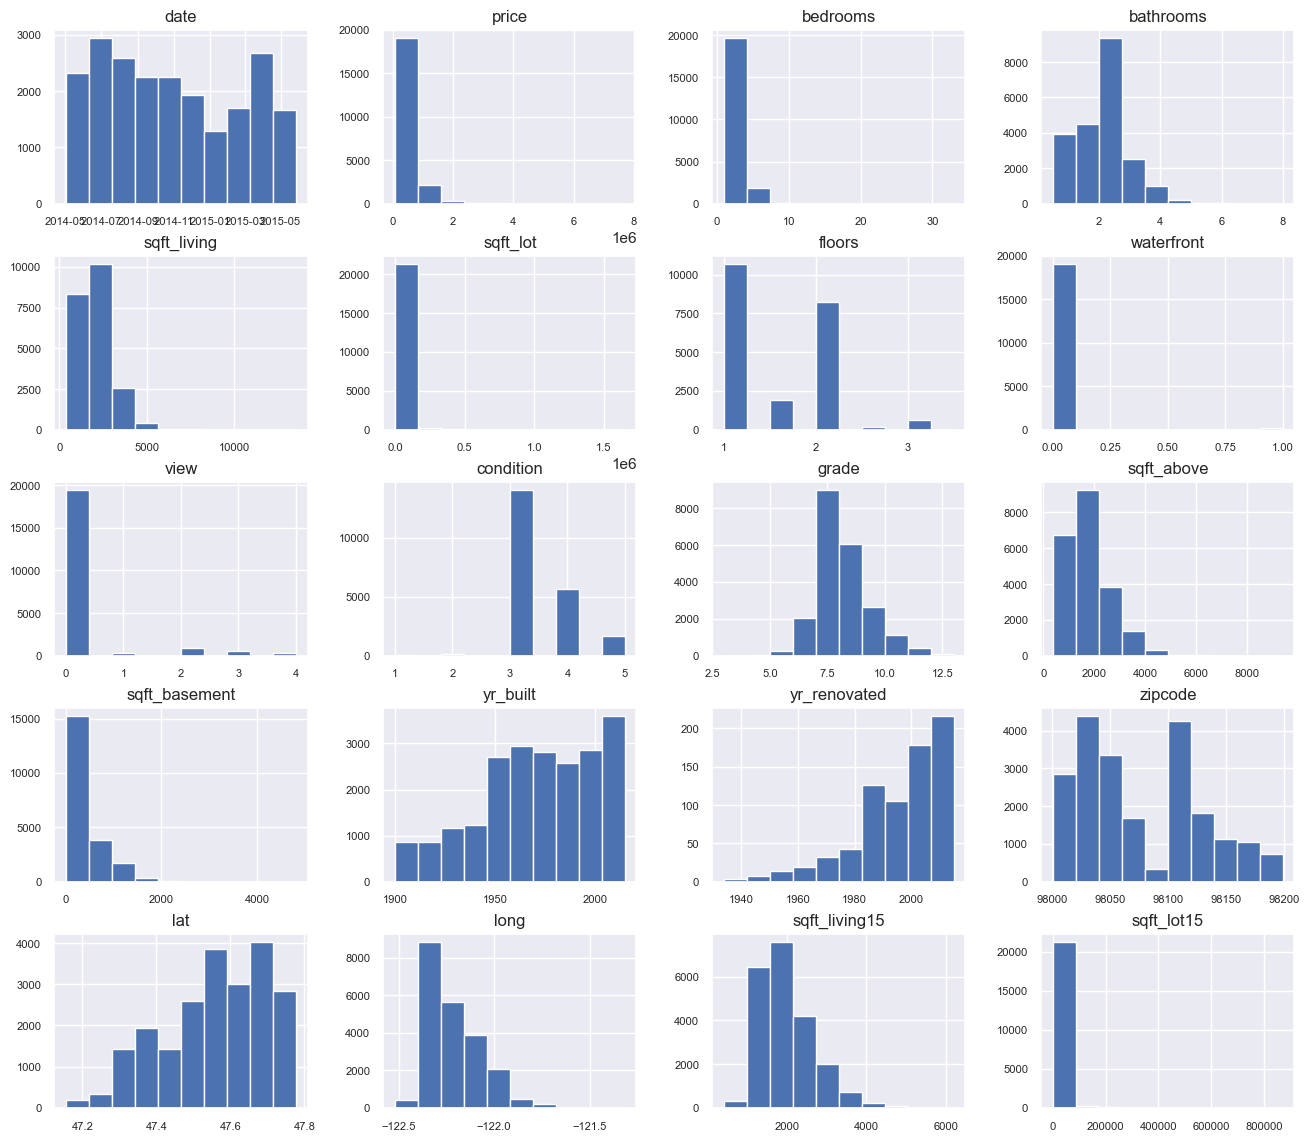

In [9]:
# Inspecting the distribution of the data
df.drop(["house_id","sales_id"],axis=1,inplace=False).hist(figsize=(16, 14), xlabelsize=8, ylabelsize=8);

### Correlation with House Price

Unsurprisingly, house price is most strongly correlated with:

1. How large the living area of the house is.
2. What state the house is in.
3. The number of bathrooms.
4. The size of the neighbor's houses.

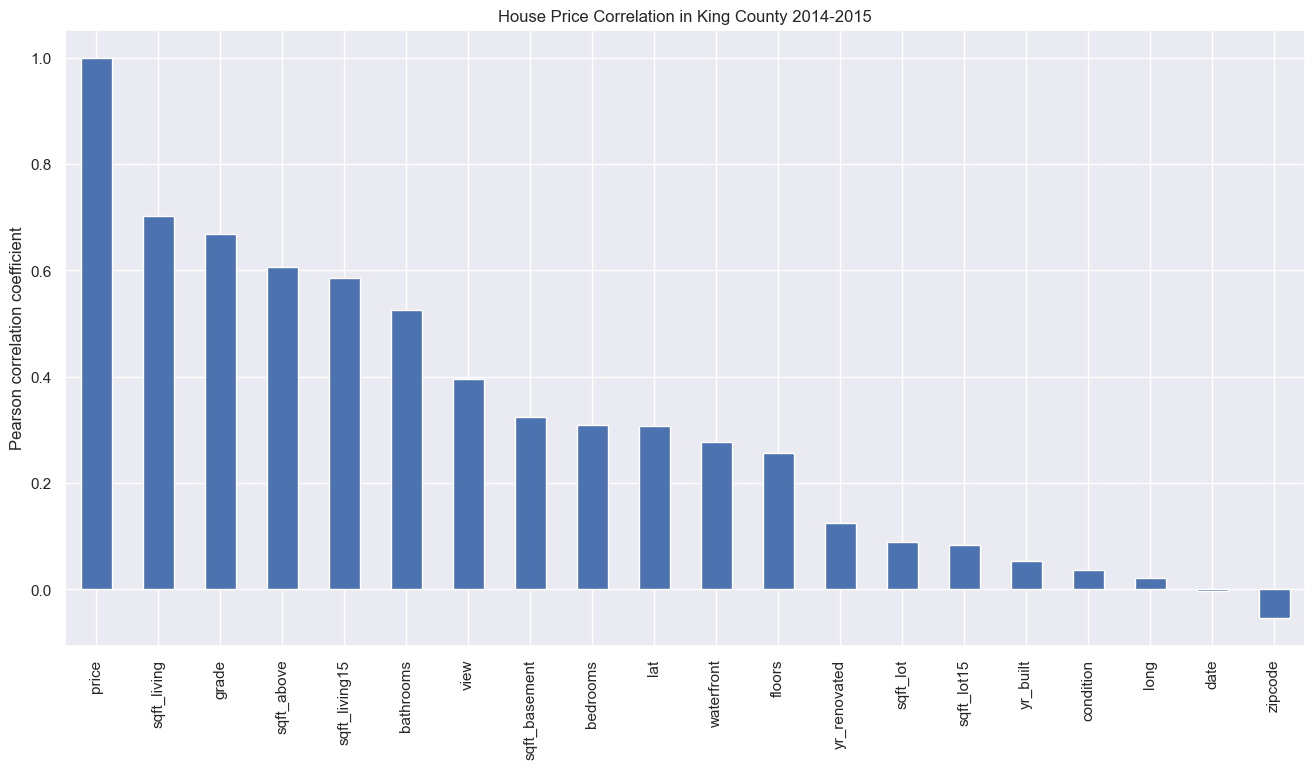

In [21]:
# Correlation matrix
corr_matrix = df.drop(["house_id","sales_id"],axis=1,inplace=False).corr()

# Plotting
ax = corr_matrix["price"].sort_values(ascending=False).plot(kind="bar")
ax.set(ylabel="Pearson correlation coefficient", title="House Price Correlation in King County 2014-2015");

## Client-Focused Data Analysis

<img src="optional/ad4bac92-7e48-410a-97ac-73a6342164fb.jpg" width="300">

### Client Description

- Thomas Hansen wants to buy a house
- He has 5 kids
- Is on a very tight budget
- Wants a nice social neighborhood
- Is wondering when and where to buy

### Key Questions

Our client recommendations are guided by the following questions:

1. *When* should our client buy?
2. *Where* should our client buy?
3. *What* should our client buy?

### Key Assumptions

Our client recommendations are constrained by two assumptions:

1. A house for 6 people needs *at least* 3 bedrooms and 2 bathrooms.
2. Social neighborhoods with a community spirit are typically characterized by *low fluctuation*.

### When to buy?

As the plots below show there are two recommendations:

1. Consider buying in February and try to avoid spring or summer.
2. Go for the middle of the month rather than the beginning or the end.


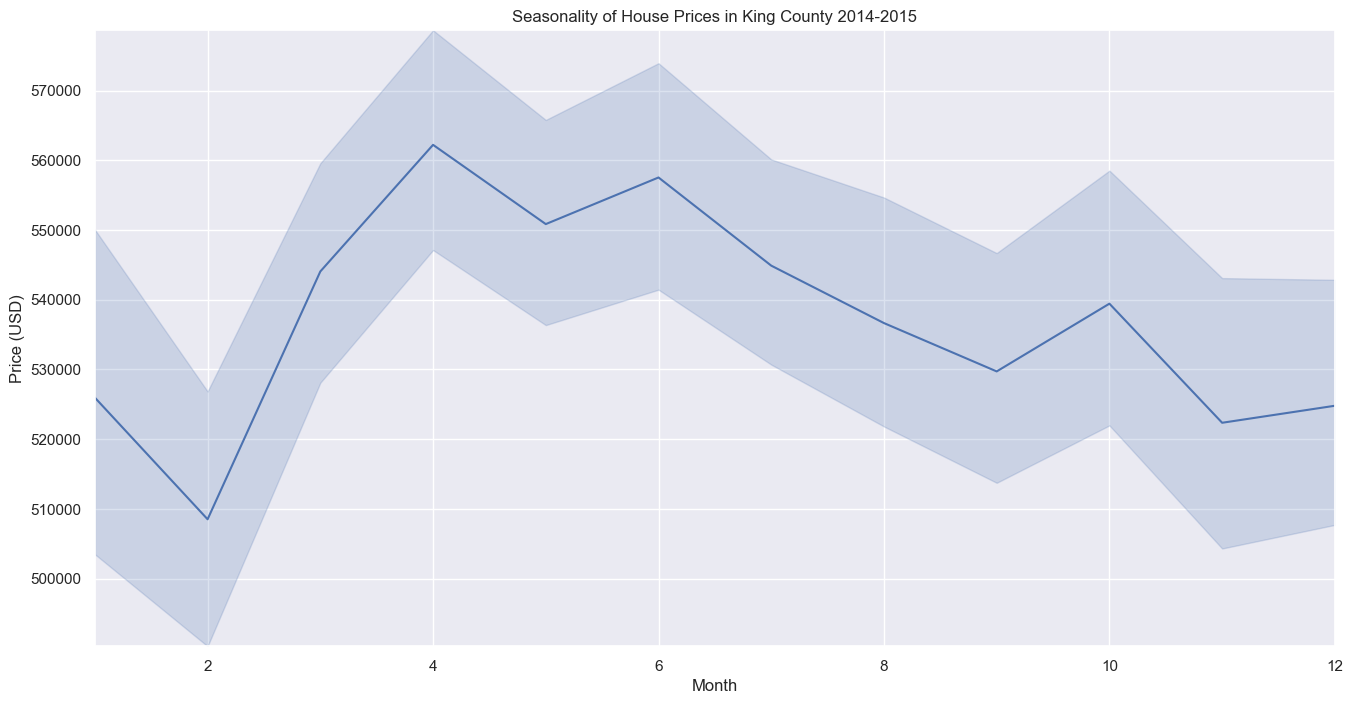

In [6]:
# Checking for seasonality of house prices
ax = sns.lineplot(df, y = "price", x= df['date'].dt.strftime('%m').astype("int"))
ax.set(xlabel='Month', ylabel='Price (USD)', title="Seasonality of House Prices in King County 2014-2015");
ax.margins(0,0)

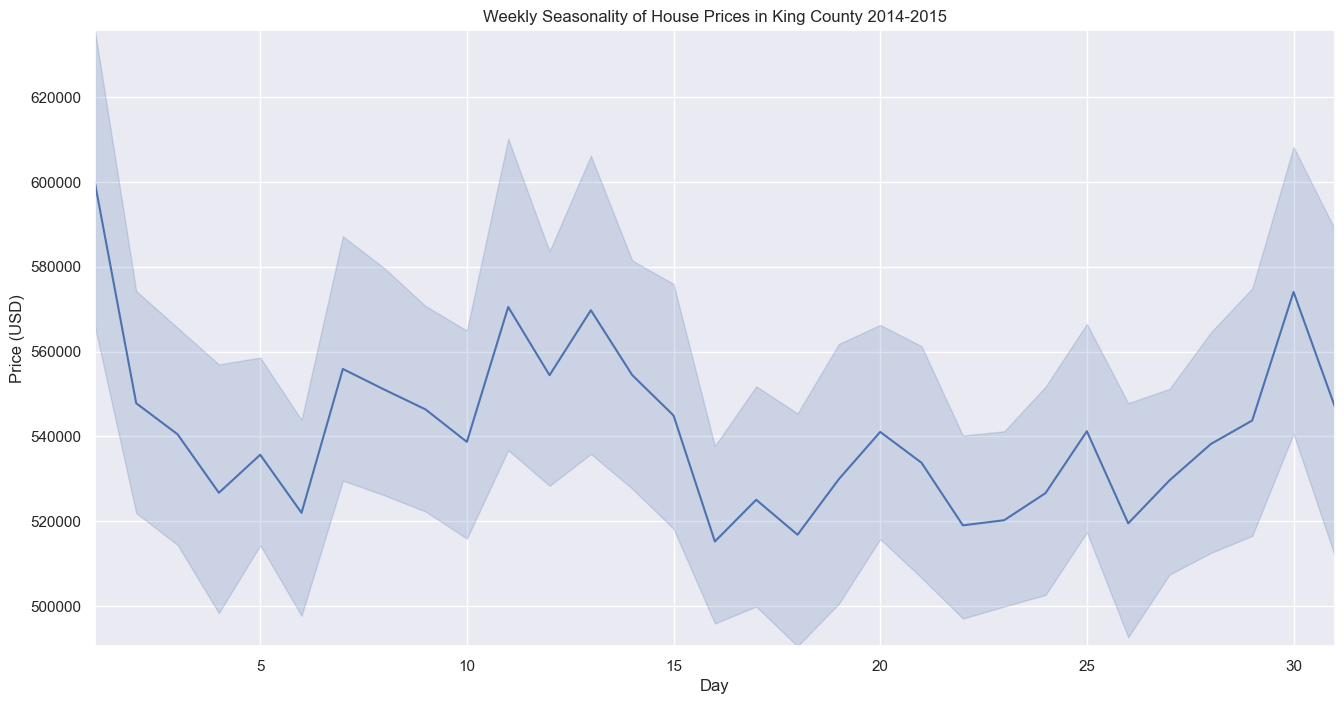

In [15]:
# Checking for weekly seasonality of house prices
ax = sns.lineplot(df, y = "price", x= df['date'].dt.strftime('%d').astype("int"))
ax.set(xlabel='Day', ylabel='Price (USD)', title="Weekly Seasonality of House Prices in King County 2014-2015");
ax.margins(0,0)

### Where to buy?

Since our client is looking for a nice social neighborhood, our recommendation is to look for low-fluctuation neighborhoods. After all, community spirit needs time and trust. Below, the neighborhoods are ranked according to their fluctuation.

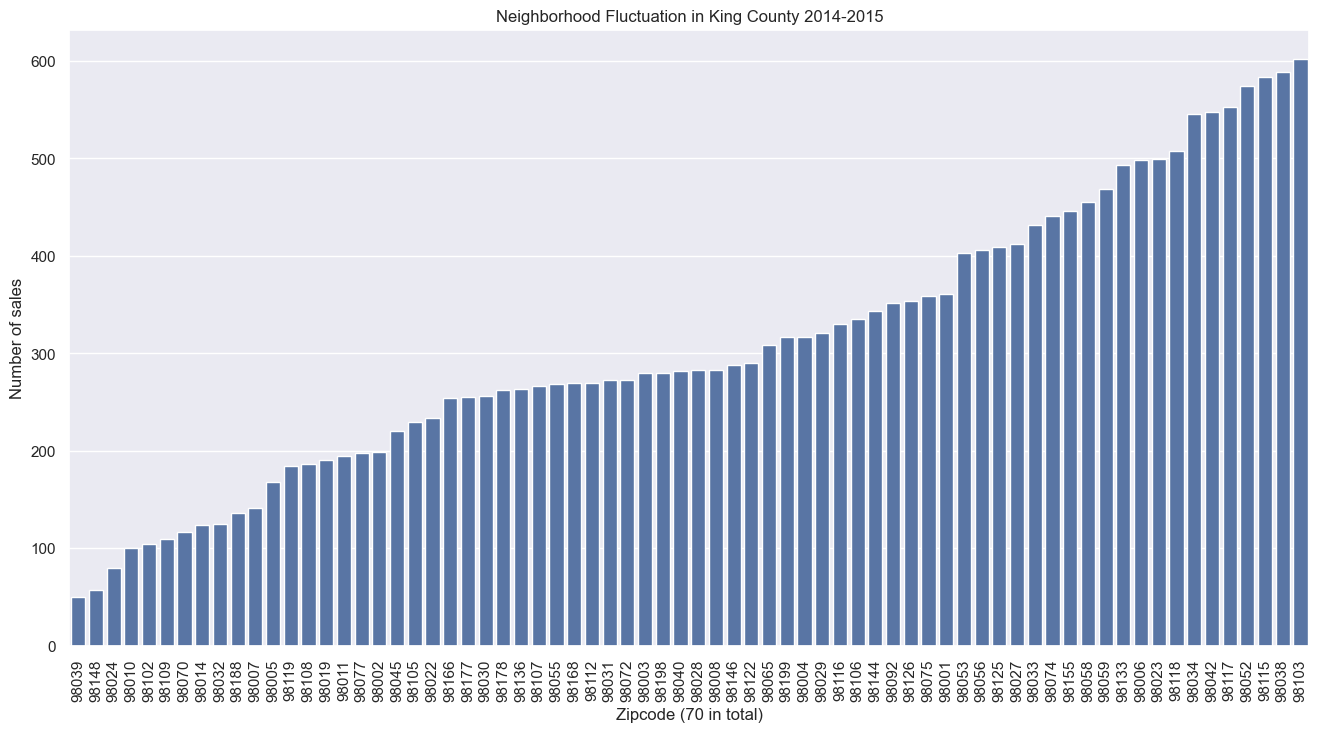

In [19]:
# Grouping by zipcode and sorting by fluctuation
group_by_zip = df.groupby("zipcode")
zipcodes_by_fluctuation = group_by_zip["zipcode"].count().sort_values()

# Create dictionary for mapping
dict(zipcodes_by_fluctuation)
df.insert(0,"zip_fluctuation",df["zipcode"].map(zipcodes_by_fluctuation))

# Plotting
ax = sns.barplot(ax = sns.barplot(y=zipcodes_by_fluctuation, x=zipcodes_by_fluctuation.index.astype("str")))
ax.set(ylabel='Number of sales', xlabel='Zipcode (70 in total)', title="Neighborhood Fluctuation in King County 2014-2015");
ax.xaxis.set_tick_params(rotation=90)

### What to buy?

Methodology:

1. Start with most affordable house with at least 3 bedrooms and 2 bathrooms
2. Ask yourself: would you be willing to pay for lower fluctuation?

Keep in mind that improving your neighborhood might compromise other aspects.

In [9]:
# Filter for houses with at least 3 bedrooms and 2 bathrooms
df_bed_bath = df[(df["bathrooms"]>= 2) & (df["bedrooms"]>=3)]
df_bed_bath_sorted_by_price = df_bed_bath.sort_values("price").head(5)
suggestions = df_bed_bath_sorted_by_price.drop(["date","sales_id","sqft_living15","sqft_lot15"], axis=1)
display(suggestions)

,zip_fluctuation,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
15796,507,133000.000,7129304540,5.000,2.000,1430.000,5600.000,1.500,0.000,0.000,3,6,1430.000,0.000,1947,NaN,98118,47.519,-122.266
15130,288,147400.000,1823049182,3.000,2.000,1080.000,9225.000,1.000,0.000,0.000,2,7,1080.000,0.000,1955,NaN,98146,47.484,-122.346
13215,262,150000.000,2976800749,4.000,2.000,1460.000,7254.000,1.000,0.000,0.000,3,6,1460.000,0.000,1959,NaN,98178,47.506,-122.254
15962,361,154000.000,3356403304,3.000,3.000,1530.000,9997.000,1.000,0.000,0.000,3,6,1020.000,510.000,1992,NaN,98001,47.286,-122.252
5402,507,158000.000,7129300595,3.000,2.000,1090.000,6090.000,1.000,0.000,0.000,3,7,940.000,150.000,1940,NaN,98118,47.512,-122.259


### Candidate Locations

In [10]:
# Geoplot

data = suggestions
# Create a map centered around the average latitude and longitude
center_lat = data['lat'].mean()
center_lon = data['long'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers to the map
for _, row in data.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
       # popup=row['name']
    ).add_to(m)

# Save the map to an HTML file
m.save("csv_map.html")


# Display the map in a Jupyter notebook (optional)
m

## Conclusion

Interesting data insights:

1. More rooms does mean higher price, but the relationship is not as strong as one might expect.
2. Older houses are not generally cheaper. The correlation is almost zero.
3. Surprisingly, just like agricultural products, house prices exhibit seasonality effects.


## Client Recommendations

2. 
3. Buying suggestions: house in Rainier Beach with 5 bedrooms for 133,000 USD.

## Bonus

<iframe src="https://www.google.com/maps/embed?pb=!4v1721028173308!6m8!1m7!1sB3FjASEL1Nz9h7h-oUlEuA!2m2!1d47.51901947760249!2d-122.265698581049!3f62.09543600000001!4f0!5f0.7820865974627469" width="900" height="500" style="border:0;" allowfullscreen="" loading="lazy" referrerpolicy="no-referrer-when-downgrade"></iframe>